# Importing Libraries and Data Sets

In [1111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1112]:
df1 = pd.read_csv('water_potability.csv')
l1 = []
l2 = []

### Analysing the Dataset informations

In [1113]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [1114]:
df1.describe(include = 'all')

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

* All the columns in the dataset are continuous variable.

### Checking for NULL values in column

In [1115]:
df1.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<AxesSubplot:>

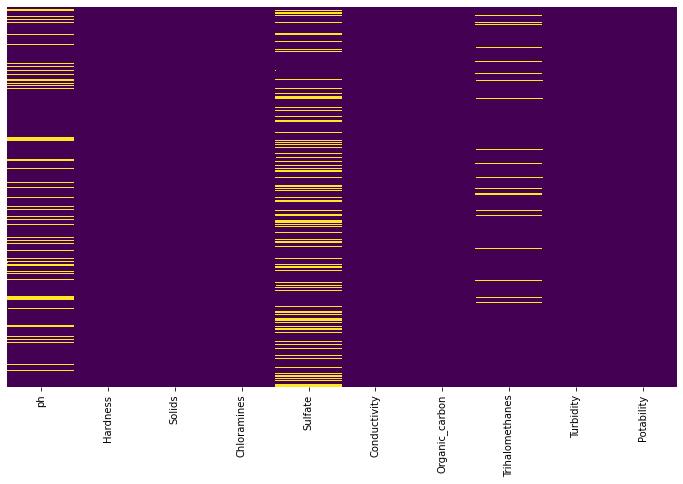

In [1116]:
plt.figure(figsize = (12,7))
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### There are some null values in ph, Sulfate, and Trihalomethanes Column
### Sulfate has more number of missing values then ph and trihalomethanes

## Removing the NULL values

In [1117]:
df1.apply(lambda x: x.fillna(x.median(),inplace=True))

ph                 None
Hardness           None
Solids             None
Chloramines        None
Sulfate            None
Conductivity       None
Organic_carbon     None
Trihalomethanes    None
Turbidity          None
Potability         None
dtype: object

# Data Analysis and Data Cleaning

## Analysing the Ph column

In [1118]:
df1.ph.mean()

7.074193521792847

In [1119]:
df1.ph.isnull().sum()

0

### There are 491 Missing values in ph column

<AxesSubplot:xlabel='ph', ylabel='Density'>

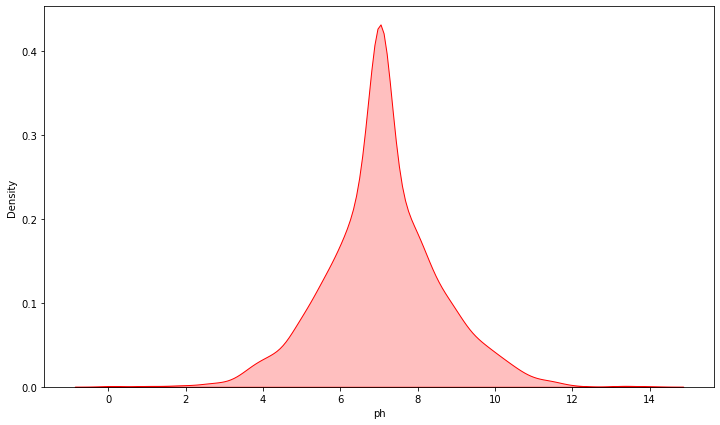

In [1120]:
plt.figure(figsize = (12,7))
sns.kdeplot(df1.ph, fill = True, color = 'r')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ph'>

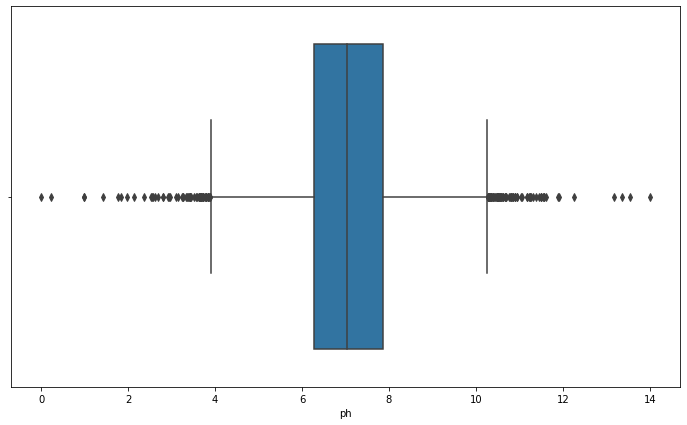

In [1121]:
plt.figure(figsize = (12,7))
sns.boxplot(df1.ph)

##### Removing outliers

In [1122]:
df1.ph.describe()

count    3276.000000
mean        7.074194
std         1.470040
min         0.000000
25%         6.277673
50%         7.036752
75%         7.870050
max        14.000000
Name: ph, dtype: float64

In [1123]:
#finding the Q1(25 percentile) and Q3(75 percentile)
IQR = df1["ph"].quantile(0.75) - df1["ph"].quantile(0.25)

In [1124]:
#defining max and min limits
max_limit = df1["ph"].quantile(0.75) + (1.5 * IQR)
min_limit = df1["ph"].quantile(0.25) - (1.5 * IQR) 

In [1125]:
df1 = df1[(df1['ph'] > min_limit) & (df1['ph'] < max_limit)]

<AxesSubplot:xlabel='ph', ylabel='Density'>

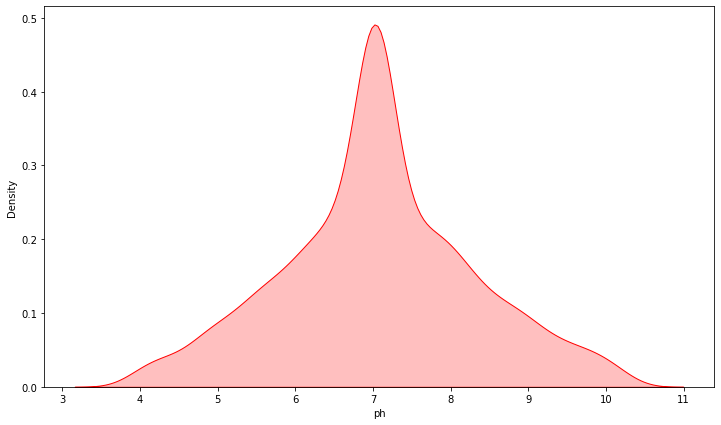

In [1126]:
plt.figure(figsize = (12,7))
sns.kdeplot(df1.ph, fill = True, color = 'r')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ph'>

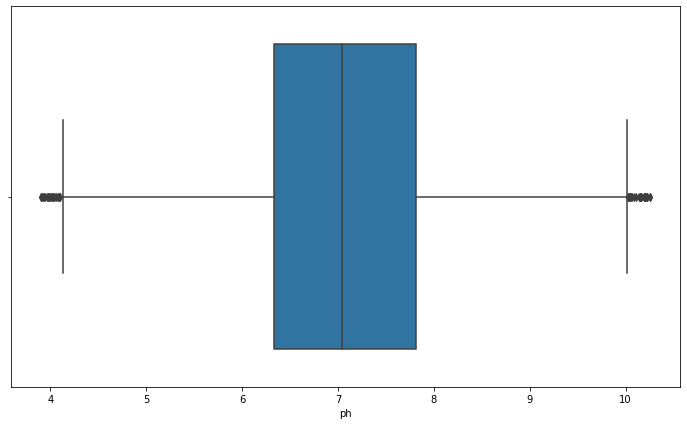

In [1127]:
plt.figure(figsize = (12,7))
sns.boxplot(df1.ph)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ph'>

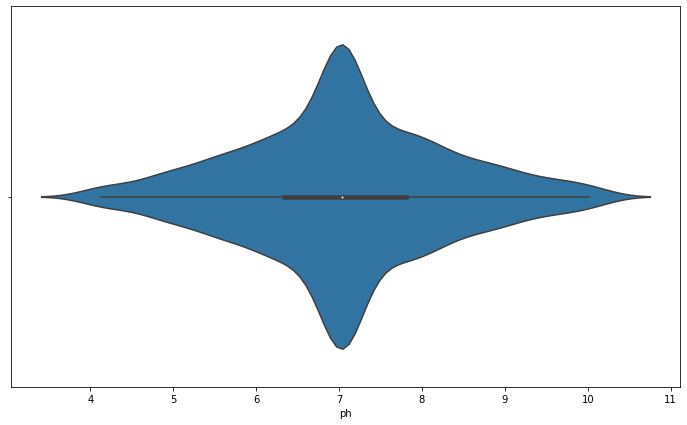

In [1128]:
plt.figure(figsize = (12,7))
sns.violinplot(df1.ph)

## Analysing Hardness Column

In [1129]:
df1.Hardness.mean()

196.6866290323796

In [1130]:
df1.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<AxesSubplot:xlabel='Hardness', ylabel='Count'>

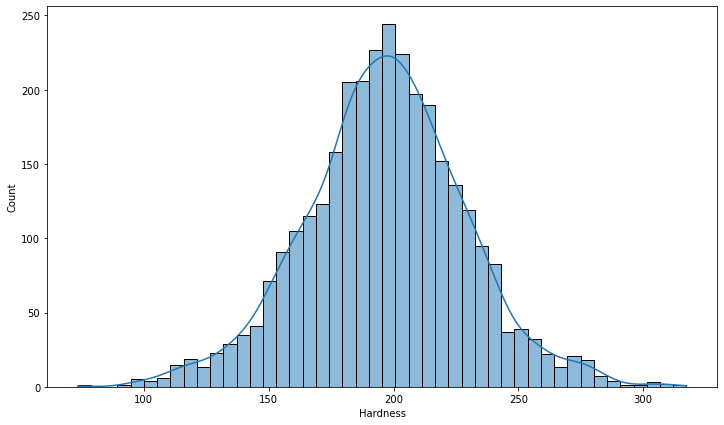

In [1131]:
plt.figure(figsize = (12,7))
sns.histplot(df1.Hardness, kde = True)

In [1132]:
df1.Hardness.describe()

count    3134.000000
mean      196.686629
std        32.151411
min        73.492234
25%       177.301113
50%       197.218638
75%       216.653284
max       317.338124
Name: Hardness, dtype: float64

In [1133]:
hard_iqr = (df1['Hardness'].quantile(0.75) - df1['Hardness'].quantile(0.25))
print(hard_iqr)
df1 = df1[(df1['Hardness'] > (df1['Hardness'].quantile(0.25) - 1.5 * hard_iqr)) & 
         (df1['Hardness'] < (df1['Hardness'].quantile(0.75) + 1.5 * hard_iqr))]

39.35217105201019


<AxesSubplot:xlabel='Hardness', ylabel='Count'>

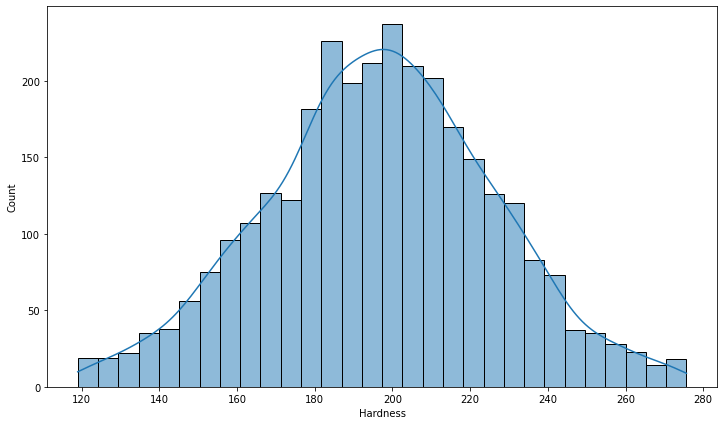

In [1134]:
plt.figure(figsize = (12,7))
sns.histplot(df1.Hardness, kde = True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hardness'>

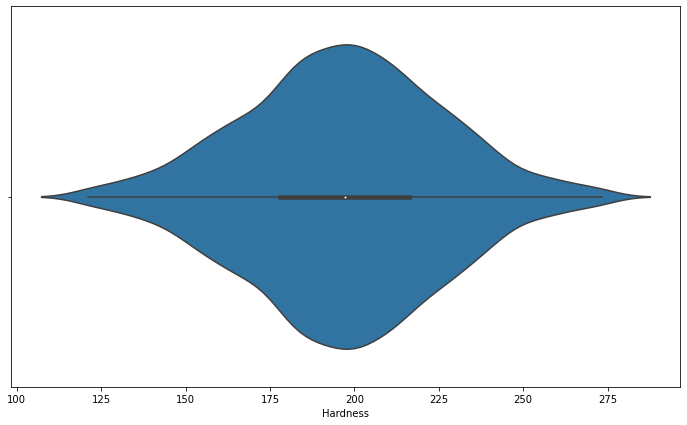

In [1135]:
plt.figure(figsize = (12,7))
sns.violinplot(df1.Hardness)

In [1136]:
df1.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Analysing Solids

In [1137]:
df1.Solids.mean()

21904.116385959675

In [1138]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3060 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3060 non-null   float64
 1   Hardness         3060 non-null   float64
 2   Solids           3060 non-null   float64
 3   Chloramines      3060 non-null   float64
 4   Sulfate          3060 non-null   float64
 5   Conductivity     3060 non-null   float64
 6   Organic_carbon   3060 non-null   float64
 7   Trihalomethanes  3060 non-null   float64
 8   Turbidity        3060 non-null   float64
 9   Potability       3060 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 263.0 KB


In [1139]:
df1.Solids.describe()

count     3060.000000
mean     21904.116386
std       8604.544084
min        320.942611
25%      15666.690297
50%      20866.335842
75%      27197.584978
max      61227.196008
Name: Solids, dtype: float64

In [1140]:
df1.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<AxesSubplot:xlabel='Solids', ylabel='Count'>

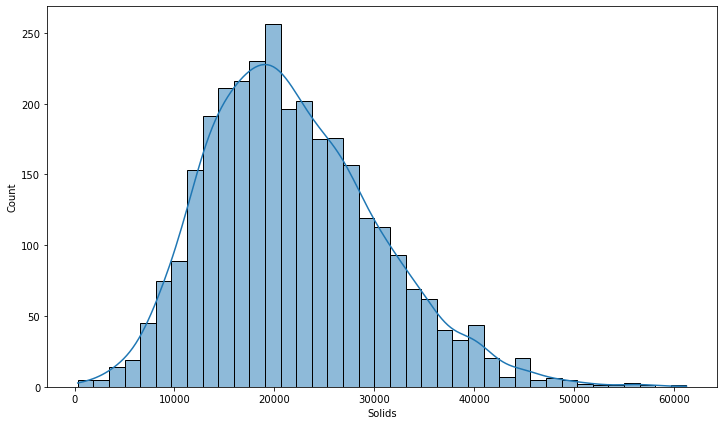

In [1141]:
plt.figure(figsize = (12,7))
sns.histplot(df1.Solids, kde = True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Solids'>

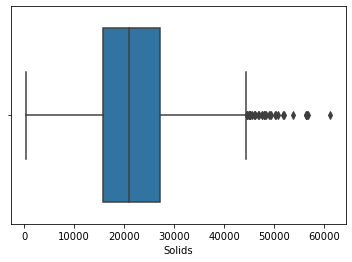

In [1142]:
sns.boxplot(df1.Solids)

In [1143]:
solid_iqr = (df1['Solids'].quantile(0.75) - df1['Solids'].quantile(0.25))
print(solid_iqr)

11530.894681479636


In [1144]:
df1 = df1[(df1['Solids'] > (df1['Solids'].quantile(0.25) - 1.5 * solid_iqr)) & 
         (df1['Solids'] < (df1['Solids'].quantile(0.75) + 1.5 * solid_iqr))]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Solids'>

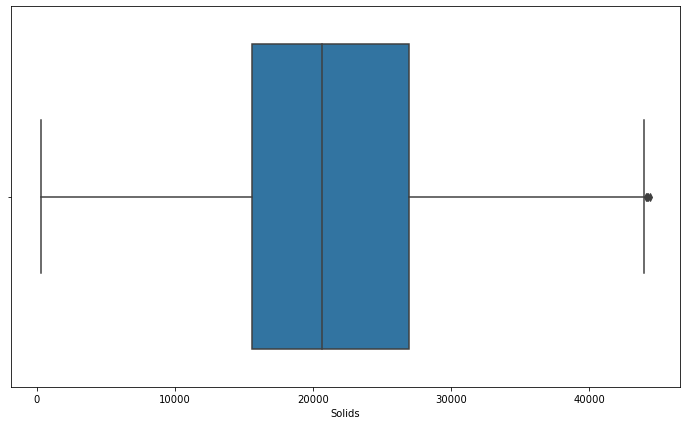

In [1145]:
plt.figure(figsize = (12,7))
sns.boxplot(df1.Solids)

<AxesSubplot:xlabel='Solids', ylabel='Count'>

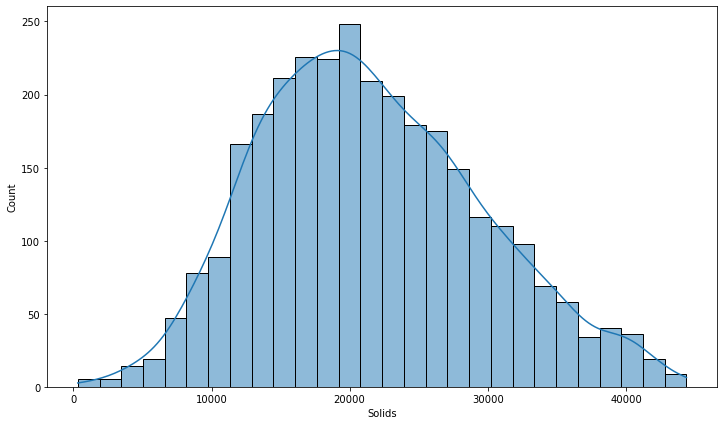

In [1146]:
plt.figure(figsize = (12,7))
sns.histplot(df1.Solids, kde = True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Solids'>

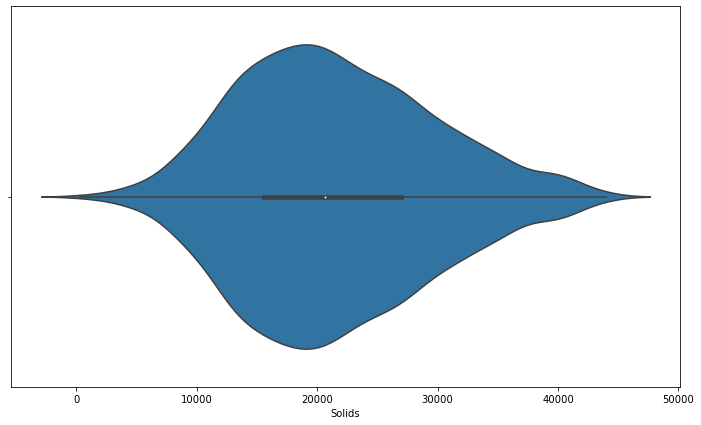

In [1147]:
plt.figure(figsize = (12,7))
sns.violinplot(df1.Solids)

## Analysing Chloramines

In [1148]:
df1.Chloramines.mean()

7.12503052176525

In [1149]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3019 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3019 non-null   float64
 1   Hardness         3019 non-null   float64
 2   Solids           3019 non-null   float64
 3   Chloramines      3019 non-null   float64
 4   Sulfate          3019 non-null   float64
 5   Conductivity     3019 non-null   float64
 6   Organic_carbon   3019 non-null   float64
 7   Trihalomethanes  3019 non-null   float64
 8   Turbidity        3019 non-null   float64
 9   Potability       3019 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 259.4 KB


In [1150]:
df1.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<AxesSubplot:xlabel='Chloramines', ylabel='Count'>

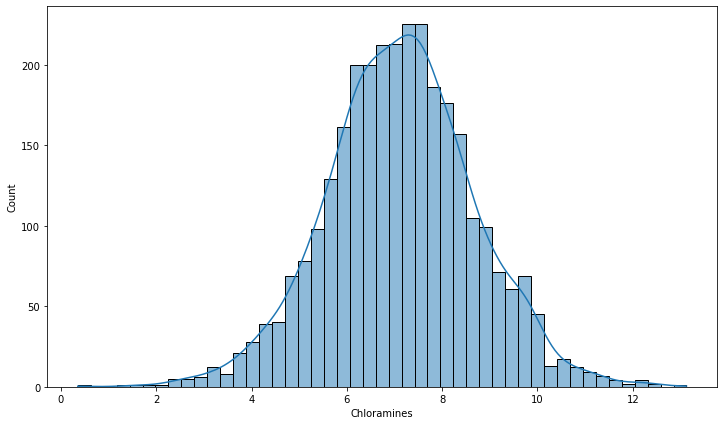

In [1151]:
plt.figure(figsize = (12,7))
sns.histplot(df1.Chloramines, kde = True, fill = True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Chloramines'>

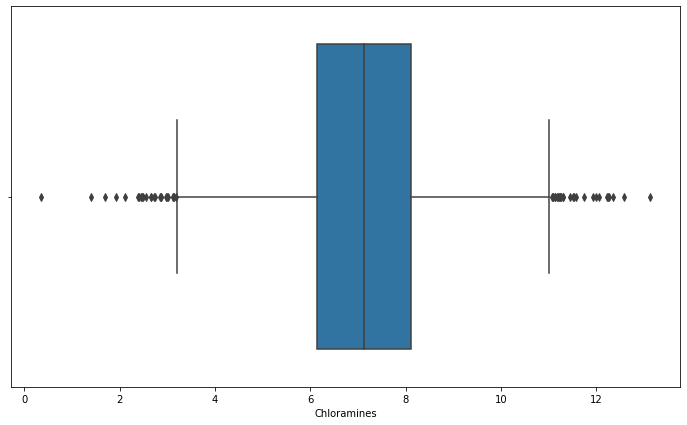

In [1152]:
plt.figure(figsize = (12,7))
sns.boxplot(df1.Chloramines)

In [1153]:
df1['Chloramines'].describe()

count    3019.000000
mean        7.125031
std         1.552494
min         0.352000
25%         6.141326
50%         7.129520
75%         8.108815
max        13.127000
Name: Chloramines, dtype: float64

In [1154]:
Chloramines_iqr = (df1['Chloramines'].quantile(0.75) - df1['Chloramines'].quantile(0.25))
print(Chloramines_iqr)

df1 = df1[(df1['Chloramines'] > (df1['Chloramines'].quantile(0.25) - 1.5 * Chloramines_iqr)) & 
         (df1['Chloramines'] < (df1['Chloramines'].quantile(0.75) + 1.5 * Chloramines_iqr))]

1.9674893491921681


In [1155]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2967 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2967 non-null   float64
 1   Hardness         2967 non-null   float64
 2   Solids           2967 non-null   float64
 3   Chloramines      2967 non-null   float64
 4   Sulfate          2967 non-null   float64
 5   Conductivity     2967 non-null   float64
 6   Organic_carbon   2967 non-null   float64
 7   Trihalomethanes  2967 non-null   float64
 8   Turbidity        2967 non-null   float64
 9   Potability       2967 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 255.0 KB


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Chloramines'>

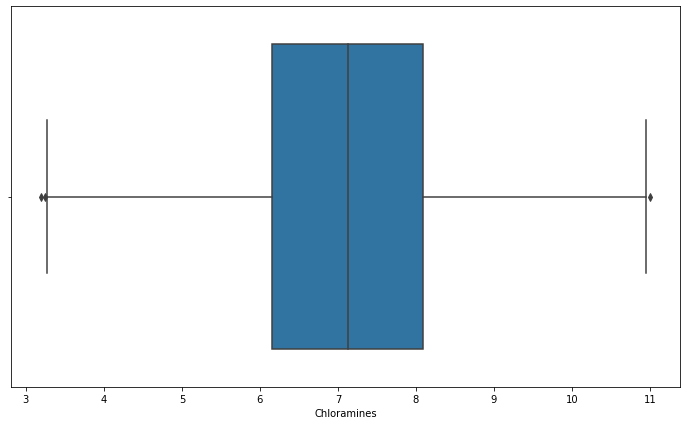

In [1156]:
plt.figure(figsize = (12,7))
sns.boxplot(df1.Chloramines)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Chloramines'>

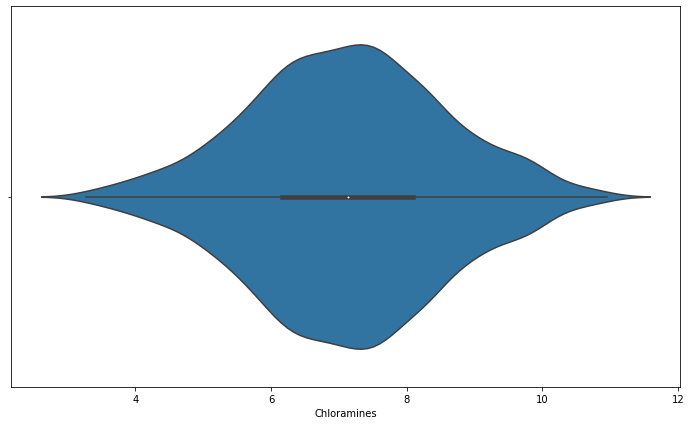

In [1157]:
plt.figure(figsize = (12,7))
sns.violinplot(df1.Chloramines)

# Analysing Sulphate column

In [1158]:
df1.Sulfate.mean()

333.7983236577144

In [1159]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2967 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2967 non-null   float64
 1   Hardness         2967 non-null   float64
 2   Solids           2967 non-null   float64
 3   Chloramines      2967 non-null   float64
 4   Sulfate          2967 non-null   float64
 5   Conductivity     2967 non-null   float64
 6   Organic_carbon   2967 non-null   float64
 7   Trihalomethanes  2967 non-null   float64
 8   Turbidity        2967 non-null   float64
 9   Potability       2967 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 255.0 KB


In [1160]:
df1.Sulfate.describe()

count    2967.000000
mean      333.798324
std        34.977775
min       187.170714
25%       317.484469
50%       333.073546
75%       350.416395
max       481.030642
Name: Sulfate, dtype: float64

In [1161]:
(df1.Sulfate.isnull().sum()/2308)*100

0.0

In [1162]:
df1.Sulfate.fillna(np.mean(df1.Sulfate), inplace = True)

In [1163]:
df1.Sulfate.mean()

333.7983236577144

In [1164]:
(df1.Sulfate.isnull().sum()/2308)*100

0.0

<AxesSubplot:xlabel='Sulfate', ylabel='Density'>

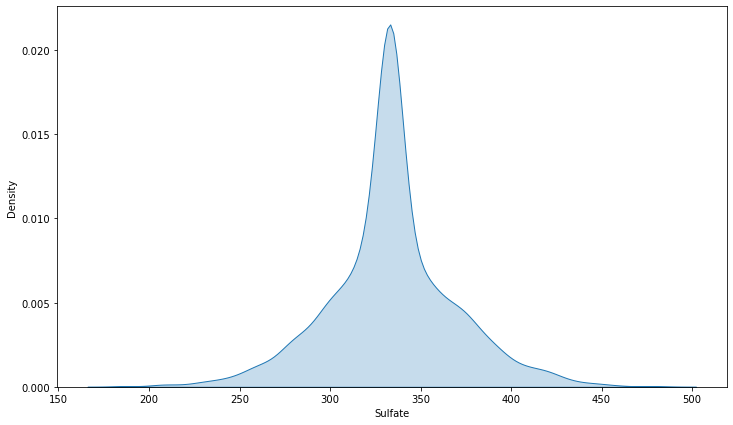

In [1165]:
plt.figure(figsize = (12,7))
sns.kdeplot(df1.Sulfate, fill = True)

In [1166]:
sulfate_iqr = (df1['Sulfate'].quantile(.75) - df1['Sulfate'].quantile(.25))

In [1167]:
print(sulfate_iqr)

df1 = df1[(df1['Sulfate'] > (df1['Sulfate'].quantile(0.25) - 1.5 * sulfate_iqr)) & 
         (df1['Sulfate'] < (df1['Sulfate'].quantile(0.75) + 1.5 * sulfate_iqr))]

32.93192535137905


<AxesSubplot:xlabel='Sulfate', ylabel='Count'>

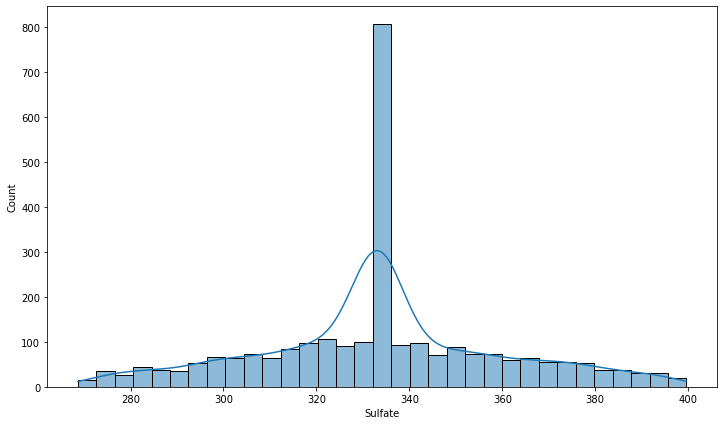

In [1168]:
plt.figure(figsize = (12,7))
sns.histplot(df1.Sulfate, kde = True)

In [1169]:
p = np.log(df1.Sulfate)

<AxesSubplot:xlabel='Sulfate', ylabel='Density'>

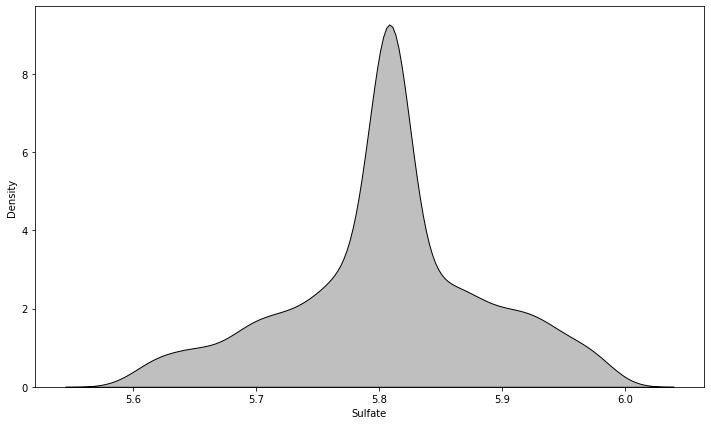

In [1170]:
plt.figure(figsize = (12,7))
sns.kdeplot(p, fill = True, color = 'black')

# Analysing Conductivity

In [1171]:
df1.Conductivity.mean()

426.0223039059112

In [1172]:
df1.Conductivity.describe()

count    2738.000000
mean      426.022304
std        80.642109
min       181.483754
25%       365.641745
50%       421.380544
75%       481.288020
max       753.342620
Name: Conductivity, dtype: float64

In [1173]:
df1.Conductivity.isnull().sum()

0

<AxesSubplot:xlabel='Conductivity', ylabel='Count'>

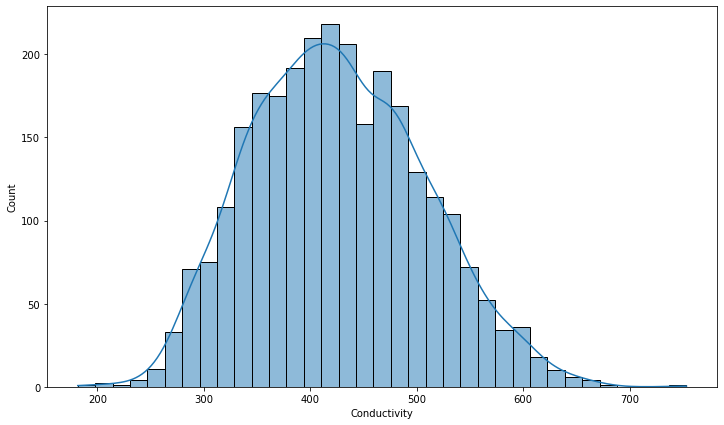

In [1174]:
plt.figure(figsize = (12,7))
sns.histplot(df1.Conductivity, kde = True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Conductivity'>

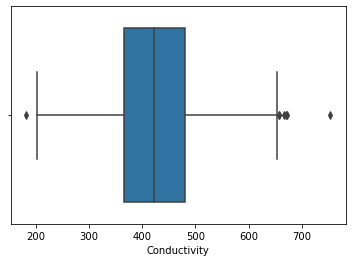

In [1175]:
sns.boxplot(df1.Conductivity)

In [1176]:
conduct_iqr = (df1['Conductivity'].quantile(0.75) - df1['Conductivity'].quantile(0.25))
print(conduct_iqr)

df1 = df1[(df1['Conductivity'] > (df1['Conductivity'].quantile(0.25) - 1.5 * conduct_iqr)) & 
         (df1['Conductivity'] < (df1['Conductivity'].quantile(0.75) + 1.5 * conduct_iqr))]

115.64627525300051


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Conductivity'>

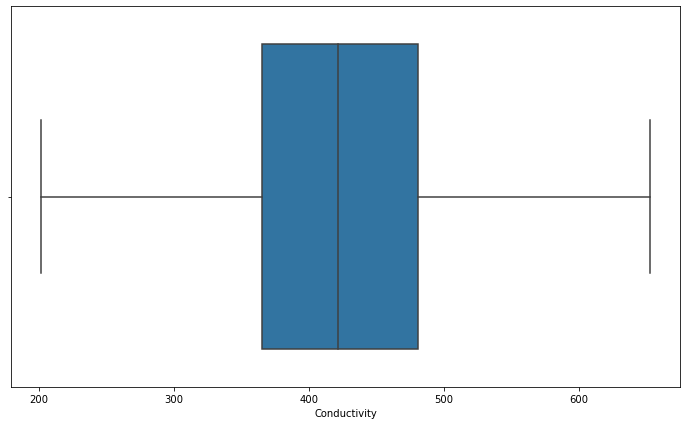

In [1177]:
plt.figure(figsize = (12,7))
sns.boxplot(df1.Conductivity)

# Analysing Organic carbon

In [1178]:
df1.Organic_carbon.mean()

14.323561709008233

In [1179]:
df1.Organic_carbon.describe()

count    2731.000000
mean       14.323562
std         3.303875
min         4.371899
25%        12.073413
50%        14.233952
75%        16.594925
max        28.300000
Name: Organic_carbon, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Organic_carbon'>

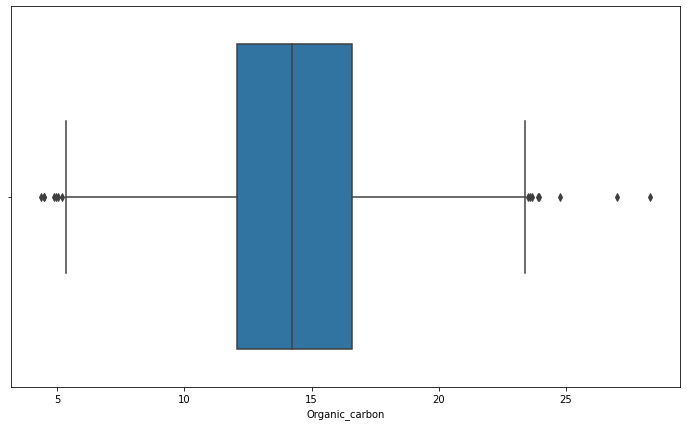

In [1180]:
plt.figure(figsize = (12,7))
sns.boxplot(df1.Organic_carbon)

In [1181]:
Organic_carbon_iqr = (df1['Organic_carbon'].quantile(0.75) - df1['Organic_carbon'].quantile(0.25))
print(Organic_carbon_iqr)

df1 = df1[(df1['Organic_carbon'] > (df1['Organic_carbon'].quantile(0.25) - 1.5 * Organic_carbon_iqr)) & 
         (df1['Organic_carbon'] < (df1['Organic_carbon'].quantile(0.75) + 1.5 * Organic_carbon_iqr))]

4.521511260725191


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Organic_carbon'>

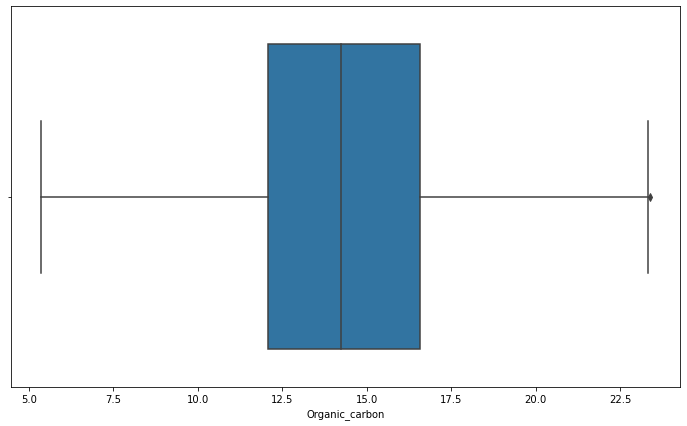

In [1182]:
plt.figure(figsize = (12,7))
sns.boxplot(df1.Organic_carbon)

# Analysing Trihalomethanes

In [1183]:
df1.Trihalomethanes.mean()

66.36301250967402

In [1184]:
df1.Trihalomethanes.describe()

count    2716.000000
mean       66.363013
std        15.965116
min         0.738000
25%        56.647656
50%        66.622485
75%        77.022534
max       124.000000
Name: Trihalomethanes, dtype: float64

In [1185]:
df1.Trihalomethanes.isnull().sum()

0

<AxesSubplot:xlabel='Trihalomethanes', ylabel='Count'>

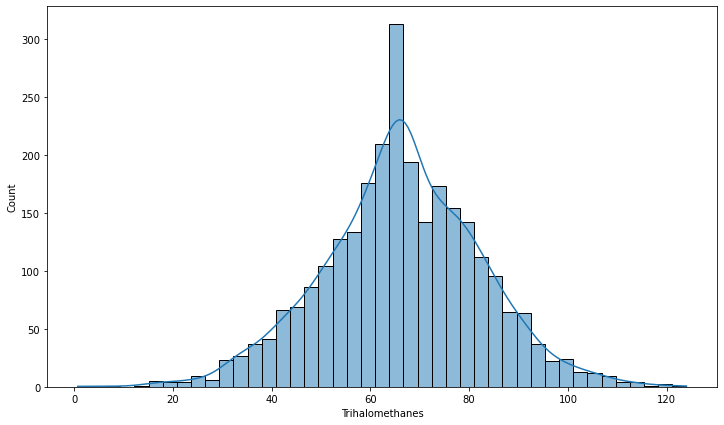

In [1186]:
plt.figure(figsize = (12,7))
sns.histplot(df1.Trihalomethanes, kde = True)

In [1187]:
lower_limit_t = (df1.Trihalomethanes.mean() - (2 * df1.Trihalomethanes.std()))
upper_limit_t = (df1.Trihalomethanes.mean() + (2 * df1.Trihalomethanes.std()))

In [1188]:
df1 = df1[(df1.Trihalomethanes > lower_limit_t) & (df1.Trihalomethanes < upper_limit_t)]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Trihalomethanes'>

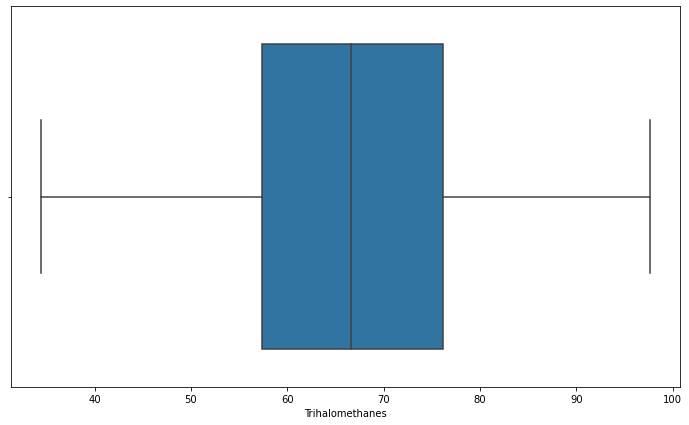

In [1189]:
plt.figure(figsize = (12,7))
sns.boxplot(df1.Trihalomethanes)

# Analysing Turbidity

In [1190]:
df1.Turbidity.mean()

3.9652789200262473

In [1191]:
df1.Turbidity.describe()

count    2570.000000
mean        3.965279
std         0.784744
min         1.450000
25%         3.433486
50%         3.945844
75%         4.501968
max         6.739000
Name: Turbidity, dtype: float64

In [1192]:
df1.Turbidity.isnull().sum()

0

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Turbidity'>

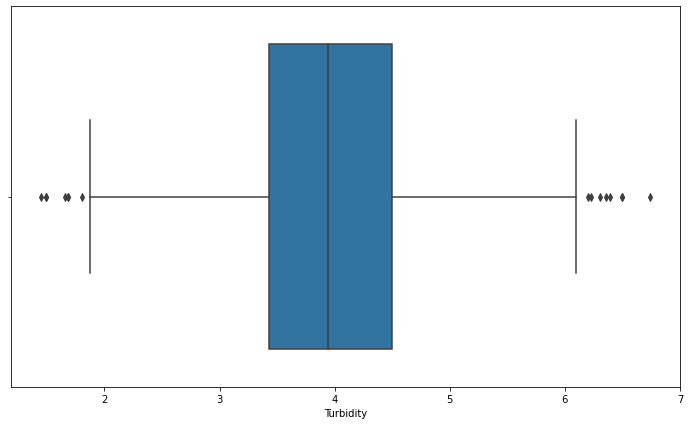

In [1193]:
plt.figure(figsize = (12,7))
sns.boxplot(df1.Turbidity)

<AxesSubplot:xlabel='Turbidity', ylabel='Count'>

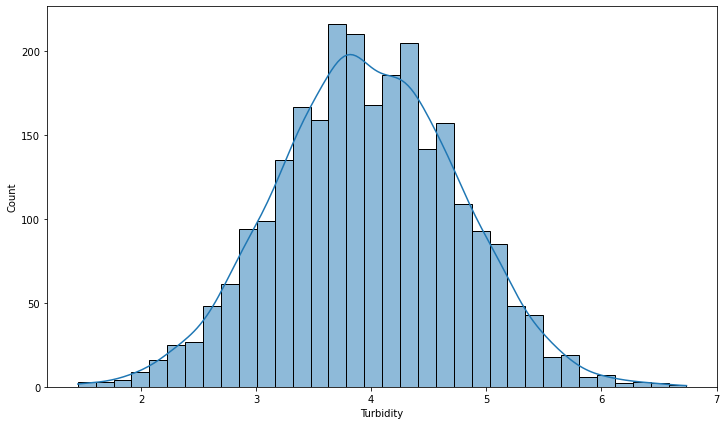

In [1194]:
plt.figure(figsize = (12,7))
sns.histplot(df1.Turbidity, kde = True, fill = True)

# Analysing Potability

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Potability', ylabel='count'>

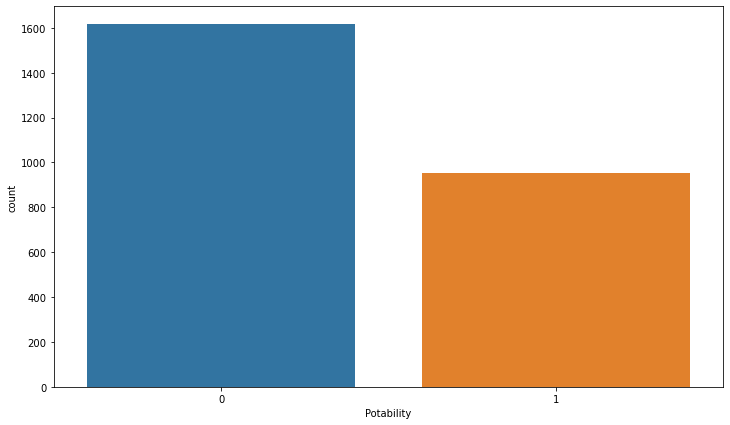

In [1195]:
plt.figure(figsize = (12,7))
sns.countplot(df1.Potability)

<AxesSubplot:>

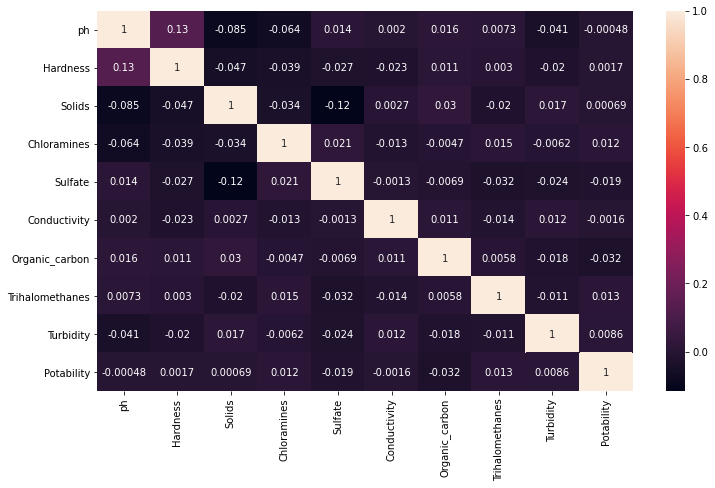

In [1196]:
plt.figure(figsize = (12,7))
sns.heatmap(df1.corr(), annot = True)

<Figure size 720x504 with 0 Axes>

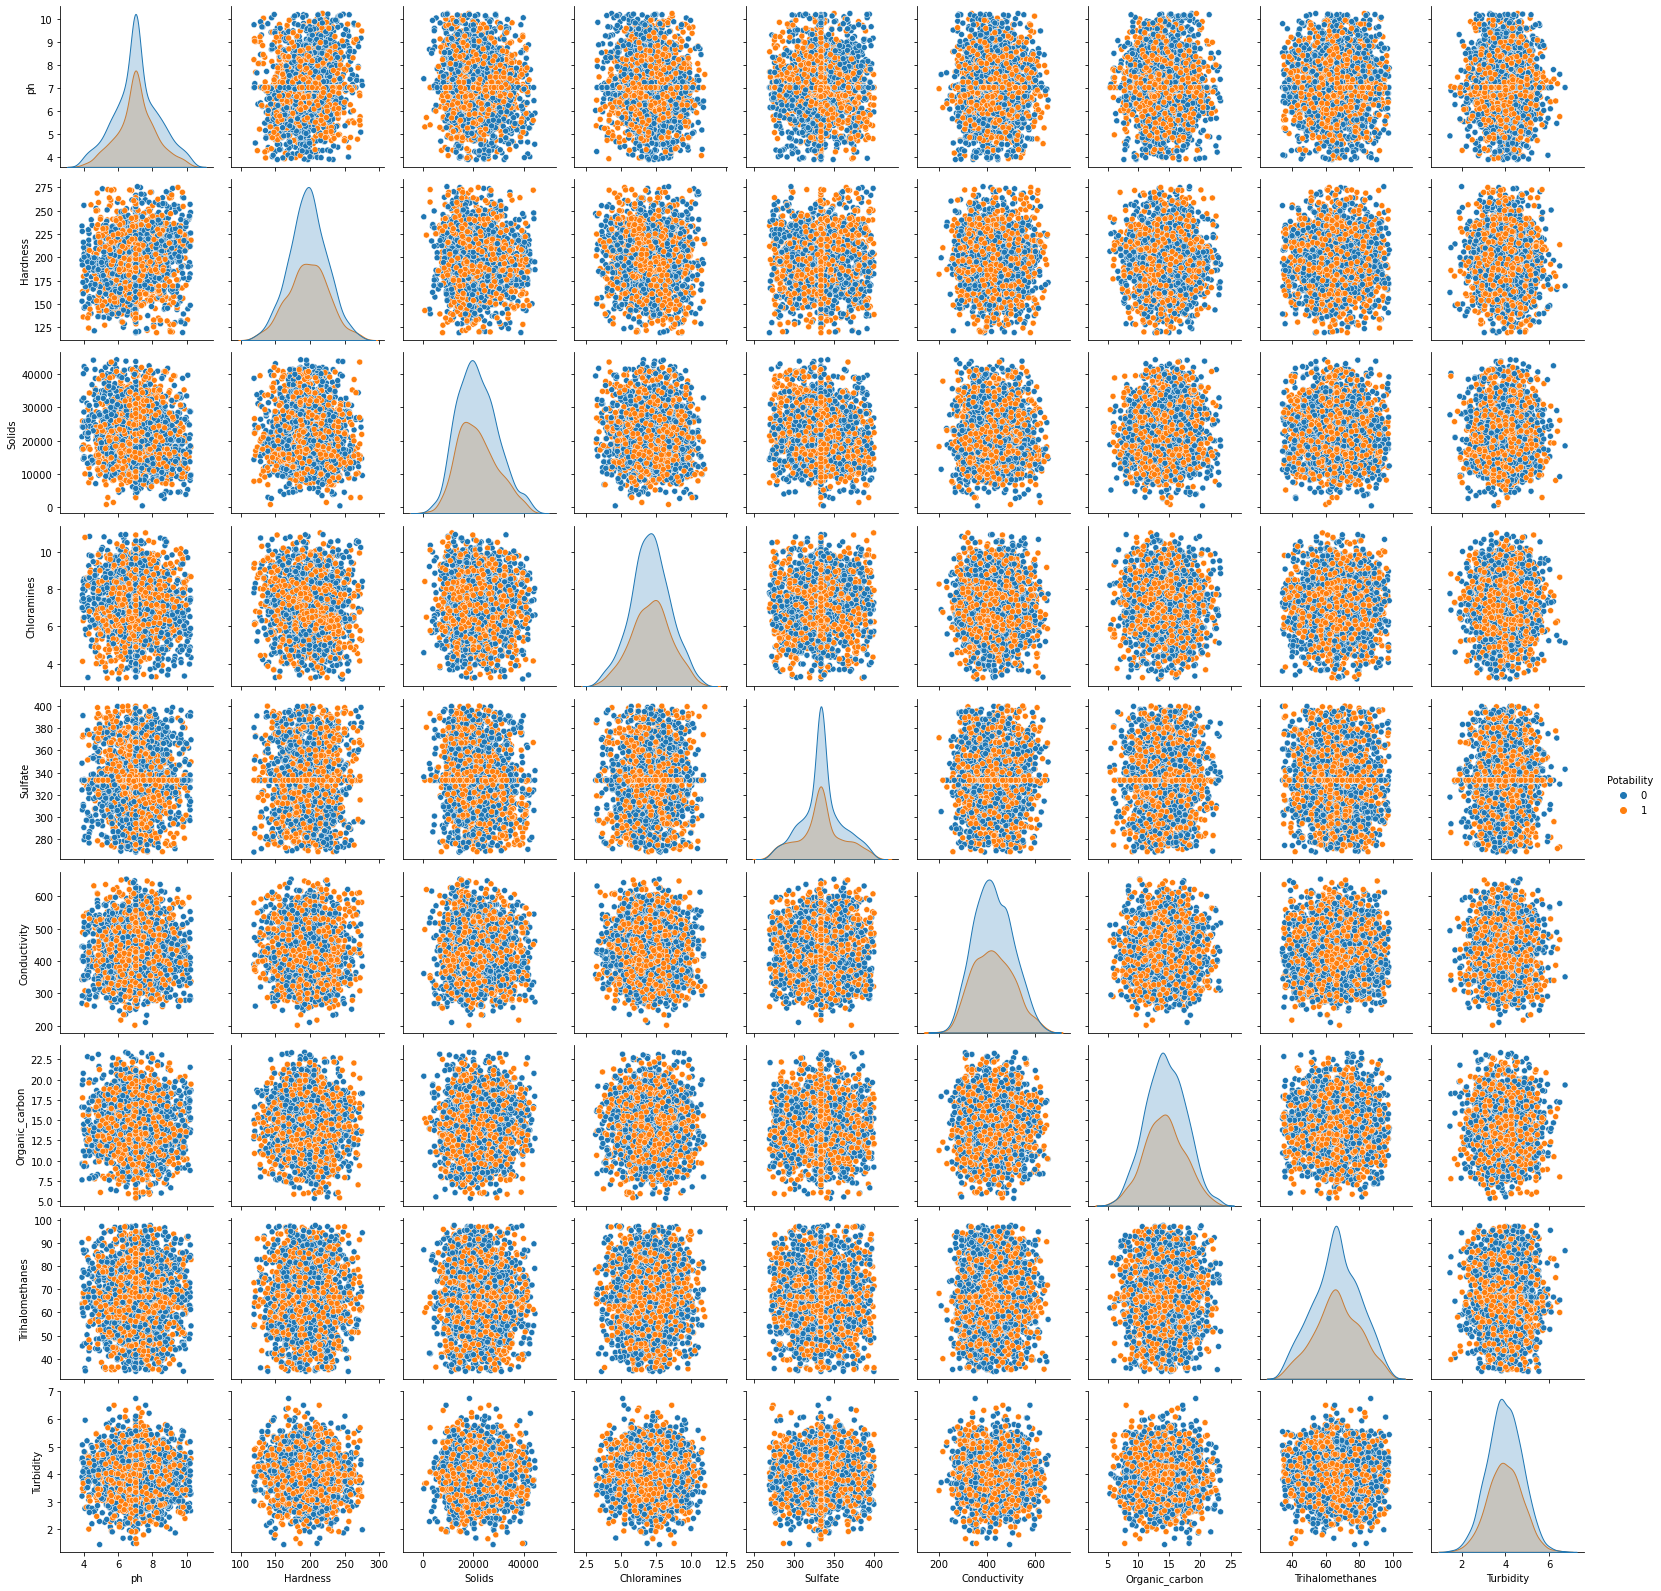

In [1197]:
plt.figure(figsize = (10,7))
sns.pairplot(df1, hue = 'Potability')

# Train Test Split

In [1198]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2570 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2570 non-null   float64
 1   Hardness         2570 non-null   float64
 2   Solids           2570 non-null   float64
 3   Chloramines      2570 non-null   float64
 4   Sulfate          2570 non-null   float64
 5   Conductivity     2570 non-null   float64
 6   Organic_carbon   2570 non-null   float64
 7   Trihalomethanes  2570 non-null   float64
 8   Turbidity        2570 non-null   float64
 9   Potability       2570 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 285.4 KB


In [1199]:
X = df1.iloc[:,:-1]
Y = df1.iloc[:,-1]

In [1200]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
x_train,x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

# Scaling the Features

In [1201]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
sc.transform(x_train)
sc.transform(x_test)

array([[-0.01625553, -0.42340536,  0.87039078, ..., -1.01743136,
        -0.3250993 , -0.70751586],
       [-0.01625553, -0.44245122,  1.35682416, ..., -0.66896569,
         1.01678281,  1.3682052 ],
       [ 1.38689422,  2.16922817, -1.13314988, ..., -0.92652837,
         0.22974815, -0.75163731],
       ...,
       [-0.23189939,  0.78076482, -0.46721075, ..., -1.18003116,
        -0.68227854,  0.4741969 ],
       [-0.00274347,  1.58333105, -0.27267616, ..., -0.42466083,
        -0.81119696,  2.17412892],
       [ 1.21642551, -1.39099213, -0.43737928, ..., -0.63177153,
        -1.07274902, -0.23403745]])

# Logistic Regression

In [1202]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()
log_r.fit(x_train, y_train)

LogisticRegression()

In [1203]:
y_pred = log_r.predict(x_test)
l1.append(accuracy_score(y_pred, y_test) * 100)
l2.append('Logistic Regression')

In [1204]:
print(f"Accuracy = {accuracy_score(y_pred, y_test)}")

Accuracy = 0.6199740596627756


In [1205]:
print(classification_report(y_test, dtc_ypred))

              precision    recall  f1-score   support

           0       0.66      0.67      0.67       478
           1       0.45      0.44      0.45       293

    accuracy                           0.58       771
   macro avg       0.56      0.56      0.56       771
weighted avg       0.58      0.58      0.58       771



# Support Vector Machine

In [1206]:
from sklearn.svm import SVC
svc = SVC(gamma = 'auto', kernel = 'rbf')
svc.fit(x_train,y_train)

SVC(gamma='auto')

In [1207]:
svc_ypred = svc.predict(x_test)
l1.append(accuracy_score(svc_ypred, y_test) * 100)
l2.append('SVC')

In [1208]:
print(f"Accuracy = {accuracy_score(svc_ypred, y_test)}")

Accuracy = 0.6199740596627756


In [1209]:
print(classification_report(y_test, svc_ypred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       478
           1       0.00      0.00      0.00       293

    accuracy                           0.62       771
   macro avg       0.31      0.50      0.38       771
weighted avg       0.38      0.62      0.47       771



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [1210]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [1211]:
dtc_ypred = dtc.predict(x_test)

In [1212]:
print(f"Accuracy = {accuracy_score(y_test, dtc_ypred)}")
l1.append(accuracy_score(y_test, dtc_ypred) * 100)
l2.append('Decision Tree')

Accuracy = 0.5875486381322957


In [1213]:
print(classification_report(y_test, dtc_ypred))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       478
           1       0.46      0.44      0.45       293

    accuracy                           0.59       771
   macro avg       0.56      0.56      0.56       771
weighted avg       0.59      0.59      0.59       771



# Gaussian NB

In [1214]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [1215]:
nb_ypred = nb.predict(x_test)
l1.append(accuracy_score(y_test, nb_ypred) * 100)
l2.append('Gaussian NB')

In [1216]:
print(f"Accuracy = {accuracy_score(y_test, nb_ypred)}")

Accuracy = 0.6173800259403373


In [1217]:
print(classification_report(y_test, nb_ypred))

              precision    recall  f1-score   support

           0       0.62      0.98      0.76       478
           1       0.44      0.03      0.05       293

    accuracy                           0.62       771
   macro avg       0.53      0.50      0.41       771
weighted avg       0.55      0.62      0.49       771



# K Nearest Neighbour

In [1218]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train,y_train)
knn_y_pred = knn.predict(x_test) 
l1.append(accuracy_score(y_test,knn_y_pred) * 100)
l2.append('KNN')
print(f"Accuracy = {accuracy_score(y_test,knn_y_pred)}")
print(classification_report(y_test,knn_y_pred))

Accuracy = 0.603112840466926
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       478
           1       0.43      0.13      0.20       293

    accuracy                           0.60       771
   macro avg       0.53      0.51      0.47       771
weighted avg       0.55      0.60      0.53       771



# Random Forest

In [1219]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 90)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=90)

In [1220]:
rfc_ypred = rfc.predict(x_test)

In [1221]:
l1.append(accuracy_score(y_test, rfc_ypred) * 100)
l2.append('Random Forest')
print(f'Accuracy = {accuracy_score(y_test, rfc_ypred)}')

Accuracy = 0.6459143968871596


In [1222]:
print(classification_report(y_test, rfc_ypred))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       478
           1       0.59      0.23      0.33       293

    accuracy                           0.65       771
   macro avg       0.62      0.56      0.54       771
weighted avg       0.63      0.65      0.59       771



/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

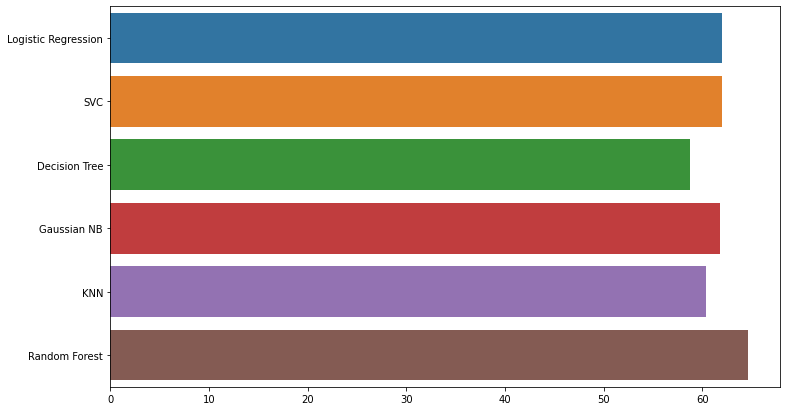

In [1225]:
plt.figure(figsize = (12,7))
sns.barplot(l1,l2)

### Random Forest Gives the best result as compared to other algorithms with the accuracy of 64.59%